In [442]:
import tensorflow as tf   
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

import os,cv2
from PIL import Image
from PIL import ImageMath
import os
import pandas as pd



import os
import random
import shutil
import glob
import splitfolders
splitfolders.ratio('Type_Pokemon', output="train_split_2", seed=1000, ratio=(.8, 0.1,0.1)) 


In [444]:
# import OS module

# Get the list of all files and directories
path = "Poke_Classes_CLEANED"
dir_list = os.listdir(path)
print("Files and directories in '", path, "' :")
# prints all files
print(dir_list)
#print(len(dir_list))

Files and directories in ' Poke_Classes_CLEANED ' :
['Bug', 'Bug Electric', 'Bug Fighting', 'Bug Fire', 'Bug Flying', 'Bug Ghost', 'Bug Grass', 'Bug Ground', 'Bug Poison', 'Bug Rock', 'Bug Steel', 'Bug Water', 'Dark', 'Dark Dragon', 'Dark Fighting', 'Dark Fire', 'Dark Flying', 'Dark Ghost', 'Dark Ice', 'Dark Psychic', 'Dark Steel', 'Dragon', 'Dragon Electric', 'Dragon Fairy', 'Dragon Fire', 'Dragon Flying', 'Dragon Ground', 'Dragon Ice', 'Dragon Psychic', 'Electric', 'Electric Dragon', 'Electric Fairy', 'Electric Fire', 'Electric Flying', 'Electric Ghost', 'Electric Grass', 'Electric Ice', 'Electric Normal', 'Electric Steel', 'Electric Water', 'Fairy', 'Fairy Flying', 'Fighting', 'Fighting Dark', 'Fighting Flying', 'Fighting Psychic', 'Fighting Steel', 'Fire', 'Fire Dragon', 'Fire Fighting', 'Fire Flying', 'Fire Ground', 'Fire Normal', 'Fire Psychic', 'Fire Rock', 'Fire Steel', 'Fire Water', 'Flying', 'Flying Dragon', 'Ghost', 'Ghost Dark', 'Ghost Dragon', 'Ghost Fire', 'Ghost Flying',

In [445]:
#setting the train/tests for the data set


data_dir= 'Poke_Classes_CLEANED'



batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)



val_ds = tf.keras.utils.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)



Found 2054 files belonging to 154 classes.
Using 1644 files for training.
Found 2054 files belonging to 154 classes.
Using 410 files for validation.


['Bug', 'Bug Electric', 'Bug Fighting', 'Bug Fire', 'Bug Flying', 'Bug Ghost', 'Bug Grass', 'Bug Ground', 'Bug Poison', 'Bug Rock', 'Bug Steel', 'Bug Water', 'Dark', 'Dark Dragon', 'Dark Fighting', 'Dark Fire', 'Dark Flying', 'Dark Ghost', 'Dark Ice', 'Dark Psychic', 'Dark Steel', 'Dragon', 'Dragon Electric', 'Dragon Fairy', 'Dragon Fire', 'Dragon Flying', 'Dragon Ground', 'Dragon Ice', 'Dragon Psychic', 'Electric', 'Electric Dragon', 'Electric Fairy', 'Electric Fire', 'Electric Flying', 'Electric Ghost', 'Electric Grass', 'Electric Ice', 'Electric Normal', 'Electric Steel', 'Electric Water', 'Fairy', 'Fairy Flying', 'Fighting', 'Fighting Dark', 'Fighting Flying', 'Fighting Psychic', 'Fighting Steel', 'Fire', 'Fire Dragon', 'Fire Fighting', 'Fire Flying', 'Fire Ground', 'Fire Normal', 'Fire Psychic', 'Fire Rock', 'Fire Steel', 'Fire Water', 'Flying', 'Flying Dragon', 'Ghost', 'Ghost Dark', 'Ghost Dragon', 'Ghost Fire', 'Ghost Flying', 'Ghost Grass', 'Ghost Poison', 'Grass', 'Grass Dark

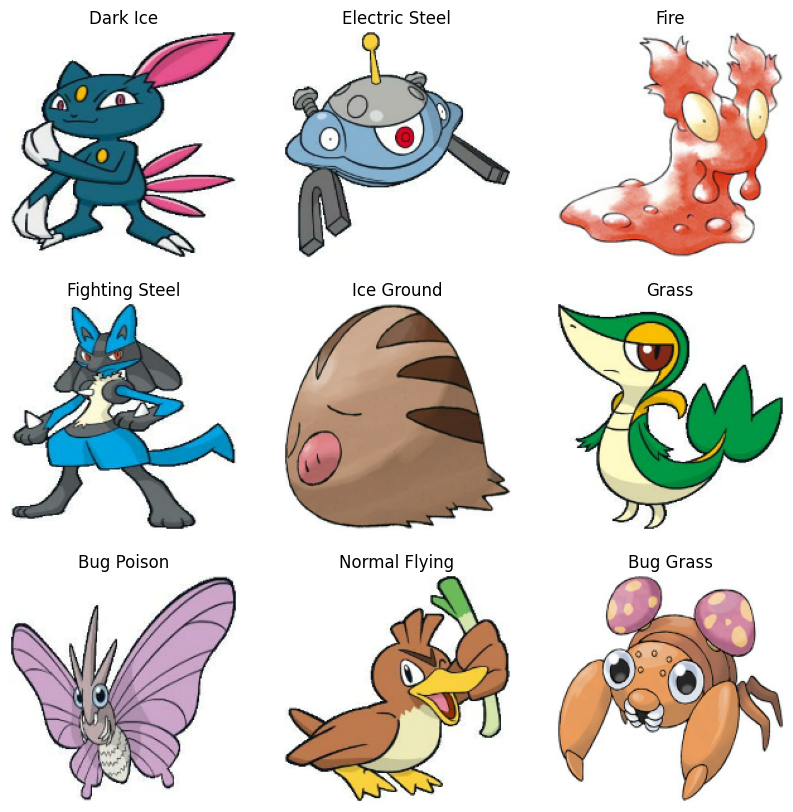

In [446]:
class_names = train_ds.class_names
print(class_names)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [447]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

normalization_layer = tf.keras.layers.Rescaling(1./255)


normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

(32, 180, 180, 3)
(32,)
0.0 1.0


In [449]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = 154

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


keras_model = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15
)


#9 okay

Epoch 1/15
52/52 [==============================] - 39s 695ms/step - loss: 4.4961 - accuracy: 0.0852 - val_loss: 4.1542 - val_accuracy: 0.1024
Epoch 2/15
52/52 [==============================] - 24s 454ms/step - loss: 4.1648 - accuracy: 0.1058 - val_loss: 4.0598 - val_accuracy: 0.1244
Epoch 3/15
52/52 [==============================] - 12s 225ms/step - loss: 3.9964 - accuracy: 0.1210 - val_loss: 3.9858 - val_accuracy: 0.1512
Epoch 4/15
52/52 [==============================] - 11s 202ms/step - loss: 3.6461 - accuracy: 0.1746 - val_loss: 3.8844 - val_accuracy: 0.1659
Epoch 5/15
52/52 [==============================] - 13s 242ms/step - loss: 3.0545 - accuracy: 0.2780 - val_loss: 3.9458 - val_accuracy: 0.1561
Epoch 6/15
52/52 [==============================] - 13s 241ms/step - loss: 2.3363 - accuracy: 0.4142 - val_loss: 4.0808 - val_accuracy: 0.1220
Epoch 7/15
52/52 [==============================] - 13s 241ms/step - loss: 1.7088 - accuracy: 0.5663 - val_loss: 5.0538 - val_accuracy: 0.1146

In [450]:
print(val_ds)
model.save('Pokemon_Type_New_Class.h5')

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


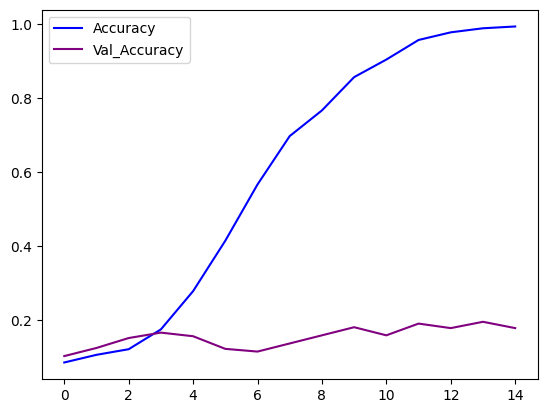

In [451]:
# Plot accuracy per iteration
plt.plot(keras_model.history['accuracy'], label='Accuracy', color='blue')
plt.plot(keras_model.history['val_accuracy'], label='Val_Accuracy', color='purple')
plt.legend()

In [452]:


image_count = len(list(data_dir))
print(image_count)

image_list = []
label_list = []
label_map_dict = {}
count_label = 0

for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    label_map_dict[class_name]=count_label

    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)

        label_list.append(count_label)
        image_list.append(image_path)

    count_label += 1
        

print ("TEST")
print (label_list)




val_size = int(image_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)


print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())



def get_label(file_path):
  # Convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)


def decode_img(img):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=3)
  # Resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])


def process_path(file_path):
  label = get_label(file_path)
  # Load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label



train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)


for image, label_list in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label_list.numpy())
  print("OKAUY")
  

array_label = np.array(label_list)
print(array_label)
print(label_map_dict)
print(image_list)

20
TEST
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 6, 6, 6, 6, 6, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 10, 10, 10, 10, 10, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 14, 14, 15, 15, 16, 16, 16, 16, 16, 17, 18, 18, 19, 19, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 24, 25, 25, 25, 25, 26, 26, 26, 27, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 31, 33, 33, 34, 37, 37, 38, 38, 38, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 41, 41, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 43, 44, 45, 45, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 51, 51, 52, 52, 53, 54, 55, 56, 58, 58, 59, 59, 59, 59, 59, 59, 59, 59, 59, 60, 62, 62, 62, 63, 63, 64, 64, 65, 65, 65, 66, 66, 66, 66, 66,

<PIL.Image.Image image mode=RGB size=180x180 at 0x1692F7D6948>
1/1 [==============================] - 0s 94ms/step


'Fire Fighting'

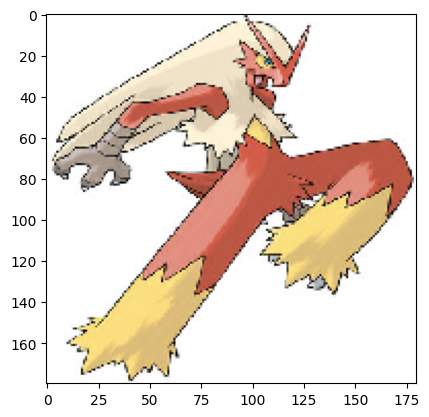

In [464]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras import models  

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# label mapping
labels = 'Bug', 'Bug Electric', 'Bug Fighting', 'Bug Fire', 'Bug Flying', 'Bug Ghost', 'Bug Grass', 'Bug Ground', 'Bug Poison', 'Bug Rock', 'Bug Steel', 'Bug Water', 'Dark', 'Dark Dragon', 'Dark Fighting', 'Dark Fire', 'Dark Flying', 'Dark Ghost', 'Dark Ice', 'Dark Psychic', 'Dark Steel', 'Dragon', 'Dragon Electric', 'Dragon Fairy', 'Dragon Fire', 'Dragon Flying', 'Dragon Ground', 'Dragon Ice', 'Dragon Psychic', 'Electric', 'Electric Dragon', 'Electric Fairy', 'Electric Fire', 'Electric Flying', 'Electric Ghost', 'Electric Grass', 'Electric Ice', 'Electric Normal', 'Electric Steel', 'Electric Water', 'Fairy', 'Fairy Flying', 'Fighting', 'Fighting Dark', 'Fighting Flying', 'Fighting Psychic', 'Fighting Steel', 'Fire', 'Fire Dragon', 'Fire Fighting', 'Fire Flying', 'Fire Ground', 'Fire Normal', 'Fire Psychic', 'Fire Rock', 'Fire Steel', 'Fire Water', 'Flying', 'Flying Dragon', 'Ghost', 'Ghost Dark', 'Ghost Dragon', 'Ghost Fire', 'Ghost Flying', 'Ghost Grass', 'Ghost Poison', 'Grass', 'Grass Dark', 'Grass Dragon', 'Grass Fairy', 'Grass Fighting', 'Grass Flying', 'Grass Ground', 'Grass Ice', 'Grass Poison', 'Grass Psychic', 'Grass Steel', 'Ground', 'Ground Dark', 'Ground Dragon', 'Ground Electric', 'Ground Fire', 'Ground Flying', 'Ground Ghost', 'Ground Psychic', 'Ground Rock', 'Ground Steel', 'Ice', 'Ice Flying', 'Ice Ghost', 'Ice Ground', 'Ice Psychic', 'Ice Water', 'Normal', 'Normal Fairy', 'Normal Fighting', 'Normal Flying', 'Normal Grass', 'Normal Ground', 'Normal Psychic', 'Normal Water', 'Poison', 'Poison Bug', 'Poison Dark', 'Poison Dragon', 'Poison Fighting', 'Poison Flying', 'Poison Ground', 'Poison Water', 'Psychic', 'Psychic Dark', 'Psychic Fairy', 'Psychic Fighting', 'Psychic Fire', 'Psychic Flying', 'Psychic Ghost', 'Psychic Grass', 'Rock', 'Rock Bug', 'Rock Dark', 'Rock Dragon', 'Rock Fairy', 'Rock Fighting', 'Rock Flying', 'Rock Grass', 'Rock Ground', 'Rock Ice', 'Rock Psychic', 'Rock Steel', 'Rock Water', 'Steel', 'Steel Dragon', 'Steel Fairy', 'Steel Fighting', 'Steel Flying', 'Steel Ghost', 'Steel Ground', 'Steel Psychic', 'Steel Rock', 'Water', 'Water Dark', 'Water Dragon', 'Water Electric', 'Water Fairy', 'Water Fighting', 'Water Flying', 'Water Ghost', 'Water Grass', 'Water Ground', 'Water Ice', 'Water Poison', 'Water Psychic', 'Water Rock', 'Water Steel'
model = models.load_model('Pokemon_Type_New_Class.h5')
 
image = load_img('Poke_Classes_CLEANED/Fire Fighting/Blaziken/0.jpg', target_size=(180, 180))

print(image)
img = np.array(image)

plt.imshow(img)



n = np.array(img)
 
# reshape a given image

#img = img / 255.0
p = n.reshape(1, 180, 180, 3)



# load image into the model
label_Pred = (labels[model.predict(p).argmax()])
 

label_Pred